# Лабораторная работа №3
## Применение логистической регрессии для решения задачи бинарной классификации
### Гончаров Ян

#### Задания к работе:
Немного поисследуем датасет:
1. Используя Matplotlib отрисовать в цвете для всех 3 сортов зависимости: 'sepal length -sepal
width’ и 'petal length - petal width'
Вы заметите что сорт setosa заметно отделен от двух других.
2. Использовать библиотеку seaborn и метод pairplot вывести результат либо для всего
датасета либо для обучающей выборки. Запомнить на будущее
3. Подготовим из имеющегося набора данных 2 датасета: в первом оставить setosa и
versicolor, во втором – versicolor и virginica
Переходим к машинному обучению:
4. Каждый датасет разбить на обучающую и тестовые выборки (понадобится для следующих
частей лабораторной работы с метриками классификации)
5. Использовать для обучения модель:
from sklearn.linear_model import LogisticRegression
с параметрами по умолчанию, например:
 clf = LogisticRegression(random_state=0)
6. Обучить модель (fit)
7. Сделать предсказание (predict)
8. Вывести значение точности модели (score)
Разделы 4 – 8 проделать для 2 датасетов полученных в п. 3.
9. Давайте теперь сгенерируем датасет случайным образом и проведем для его бинарную
классификацию.
Сгенерируем выборку для классификации самостоятельно, используя make_classification из
библиотеки scikit-learn.

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
n_informative=2,random_state=1, n_clusters_per_class=1)

Отрисовать полученный датасет используя Matplotlib и провести бинарную классификацию по
пунктам 5 - 8


Часть 2:
Решить задачу многоклассовой логистической регрессии. Отрисовать полученное решение на плоскости 'petal length  - petal width'.


### Загружаем датасет и переходим к объекту DataFrame

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Разделим данные по сорту цветков

In [2]:
setosa = pd.DataFrame(df.loc[df['target'] == 0])
setosa_target = setosa['target']
setosa = setosa.drop(['target'], axis=1)

versicolor = df.loc[df['target'] == 1]
versicolor_target = versicolor['target']
versicolor = versicolor.drop(['target'], axis=1)

virginica = df.loc[df['target'] == 2]
virginica_target = virginica['target']
virginica = virginica.drop(['target'], axis=1)

setosa

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Теперь построим зависимости длины и ширины чашелистика цветка для каждого из сортов

Setosa

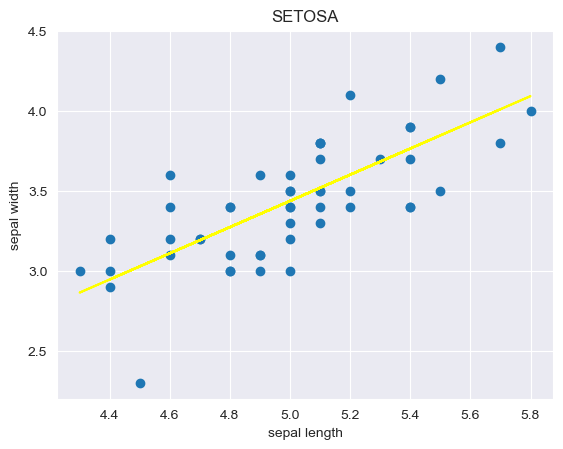

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

X = np.asarray(setosa['sepal length (cm)']).reshape(-1, 1)
y = np.asarray(setosa['sepal width (cm)']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

b = regressor.coef_[0][0]
a = regressor.intercept_[0]

f = lambda x: b*x + a

plt.scatter(X, y)
plt.plot(X, f(X), 'yellow')
plt.title("SETOSA")
plt.xlabel("sepal length")
plt.ylabel('sepal width')
plt.show()

Versicolor

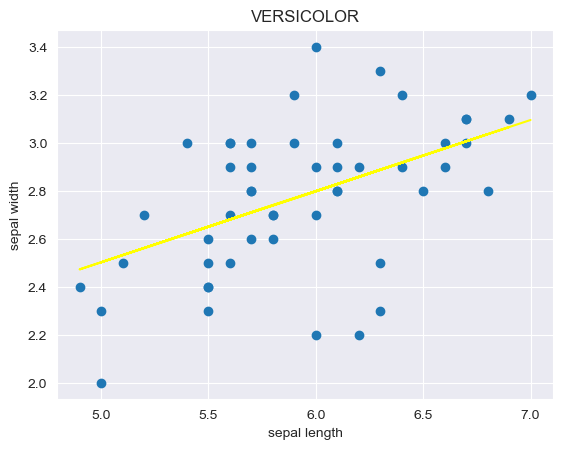

In [4]:
X = np.asarray(versicolor['sepal length (cm)']).reshape(-1, 1)
y = np.asarray(versicolor['sepal width (cm)']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

b = regressor.coef_[0][0]
a = regressor.intercept_[0]

f = lambda x: b*x + a

plt.scatter(X, y)
plt.plot(X, f(X), 'yellow')
plt.title("VERSICOLOR")
plt.xlabel("sepal length")
plt.ylabel('sepal width')
plt.show()

Virginica

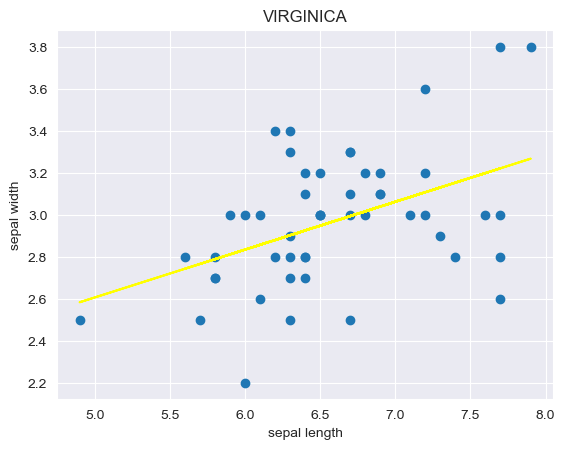

In [5]:
X = np.asarray(virginica['sepal length (cm)']).reshape(-1, 1)
y = np.asarray(virginica['sepal width (cm)']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

b = regressor.coef_[0][0]
a = regressor.intercept_[0]

f = lambda x: b*x + a

plt.scatter(X, y)
plt.plot(X, f(X), 'yellow')
plt.title("VIRGINICA")
plt.xlabel("sepal length")
plt.ylabel('sepal width')
plt.show()

Можем заметить что у сорта setosa более широкие и менее длинные чашелистики, чем у остальных сортов выборки

### Использовать библиотеку seaborn и метод pairplot вывести результат либо для всего датасета либо для обучающей выборки

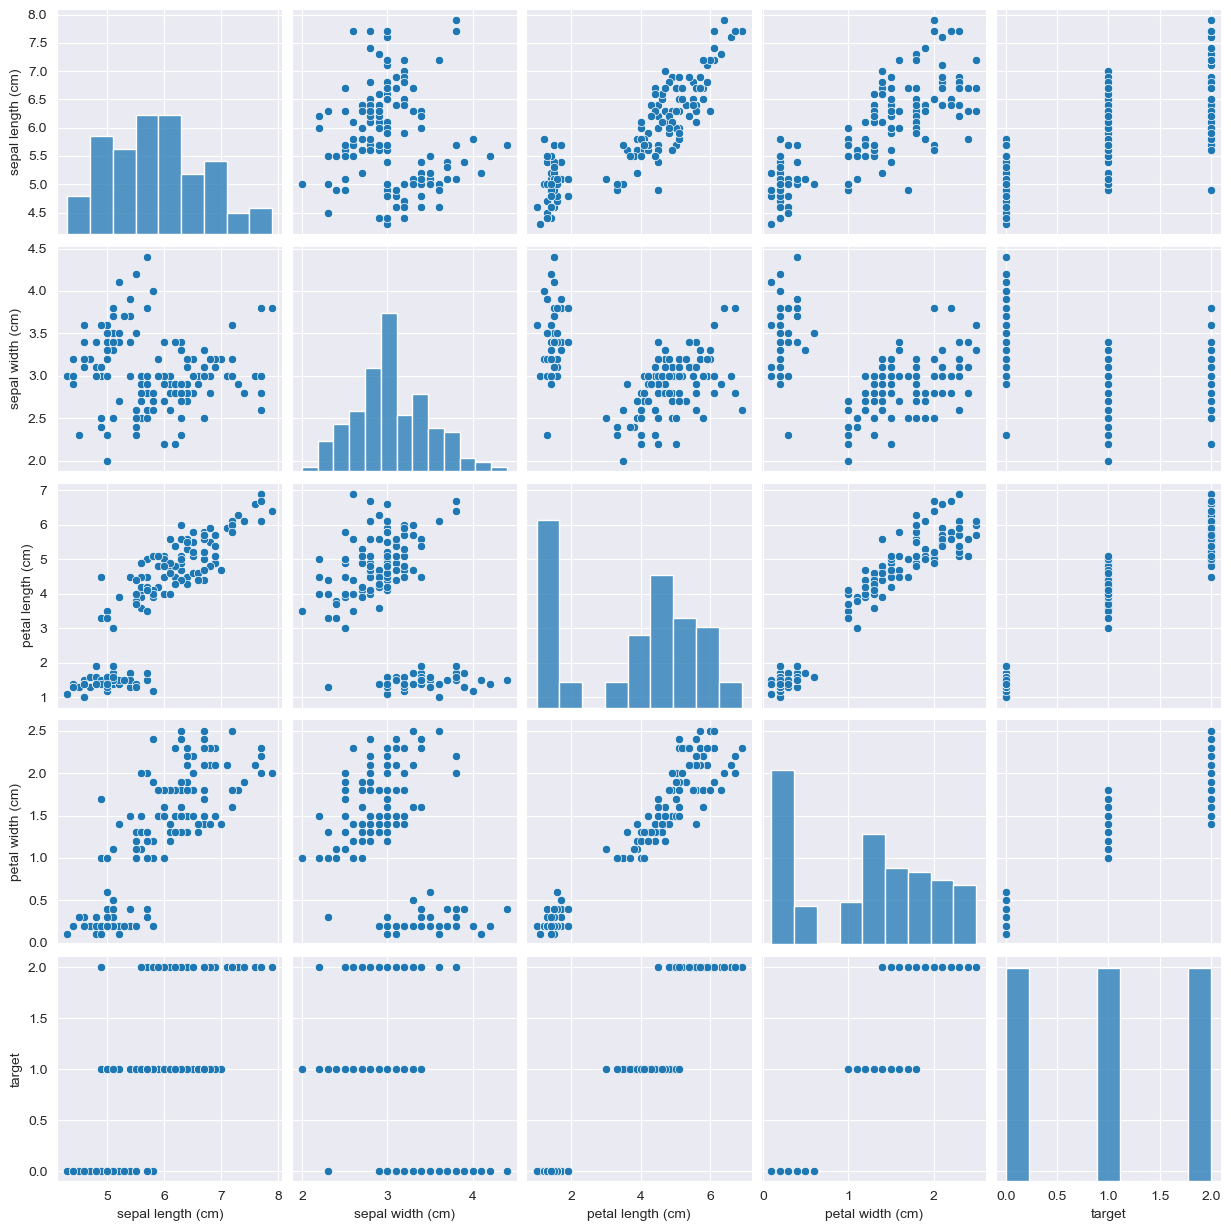

In [6]:
import seaborn as sns

sns.pairplot(df)

Запомним на будущее

### Подготовим из имеющегося набора данных 2 датасета: в первом оставим setosa и versicolor, во втором – versicolor и virginica


In [7]:
data_sv = pd.concat([setosa, versicolor], axis = 0)
target_sv = pd.concat([setosa_target, versicolor_target], axis = 0)

data_vv = pd.concat([versicolor, virginica], axis = 0)
target_vv = pd.concat([versicolor_target, virginica_target], axis = 0)

## Переходим к машинному обучению
### Разобьём каждый датасет на обучающую и тестовые выборки, обучим модель, сделаем предсказание и выведем значение точности модели
Для data_sv:

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

X = data_sv
y = target_sv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LogisticRegression(random_state=0)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(res)
print("Точность: ", accuracy_score(y_test, y_pred))

    Actual  Predicted
26       0          0
86       1          1
2        0          0
55       1          1
75       1          1
93       1          1
16       0          0
73       1          1
54       1          1
95       1          1
53       1          1
92       1          1
78       1          1
13       0          0
7        0          0
30       0          0
22       0          0
24       0          0
33       0          0
8        0          0
Точность:  1.0


Видно что модель научилась различать цветки сортов setosa и versicolor с идеальной точностью

Теперь попробуем обучить модель на сортах versicolor и virginica

In [9]:
X = data_vv
y = target_vv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LogisticRegression(random_state=0)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(res)
print("Точность: ", accuracy_score(y_test, y_pred))

     Actual  Predicted
76        1          1
136       2          2
52        1          1
105       2          2
125       2          2
143       2          2
66        1          1
123       2          2
104       2          2
145       2          2
103       2          2
142       2          2
128       2          2
63        1          1
57        1          1
80        1          1
72        1          2
74        1          1
83        1          2
58        1          1
Точность:  0.9


По-скольку цветки этих сортов отличаются не так сильно как setosa, то и ошибок модель допустила больше
Это так же можно увидеть из набора графиков, изображённых нами ранее при помощи pairplot

### Теперь сгенерируем выборку для классификации самостоятельно, используя make_classification из библиотеки scikit-learn.

In [10]:
%matplotlib notebook
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_informative=2,random_state=1, n_clusters_per_class=1)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0], X[1], y)
plt.show()

<IPython.core.display.Javascript object>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LogisticRegression(random_state=0)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(y_test, pd.DataFrame(y_pred))

print("Точность: ", accuracy_score(y_test, y_pred))

     0
993  0
859  1
298  0
553  0
672  0
..  ..
679  1
722  0
215  1
653  0
150  1

[200 rows x 1 columns]      0
0    1
1    1
2    0
3    0
4    1
..  ..
195  1
196  0
197  1
198  0
199  1

[200 rows x 1 columns]
Точность:  0.925


C:\Users\YEP\.conda\envs\newConda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Часть 2. Решим задачу многоклассовой регрессии

In [12]:
X = df.drop(["target"], axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LogisticRegression(random_state=0, max_iter=1000)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(accuracy_score(y_test, y_pred))

1.0


In [14]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x = X_test['petal width (cm)']
y = X_test['petal length (cm)']
z = pd.DataFrame(y_pred)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("petal width")
ax.set_ylabel("petal length")
ax.set_zlabel("class")
ax.scatter(x, y, z)
plt.show()

<IPython.core.display.Javascript object>